In [1]:
import numpy as np
import tensorflow as tf
import imageio
from matplotlib import pyplot as plt

/Users/barney/miniconda3/envs/fastai-cpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
class DeeplabModel(object):
    INPUT_TENSOR_NAME = 'ImageTensor:0'
    OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
    IMAGE_SHAPE = (600, 800)
    
    def __init__(self):
        self.graph = tf.Graph()
        pb_file = open('frozen_inference_graph.pb', 'rb')
        graph_def = tf.GraphDef.FromString(pb_file.read())
        pb_file.close()
        
        with self.graph.as_default():
            tf.import_graph_def(graph_def, name='')
        
        self.sess = tf.Session(graph=self.graph)
        
    def predict(self, image):
        batch_seg_map = self.sess.run(
            self.OUTPUT_TENSOR_NAME,
            feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(image)]})
        seg_map = batch_seg_map[0]
        return seg_map

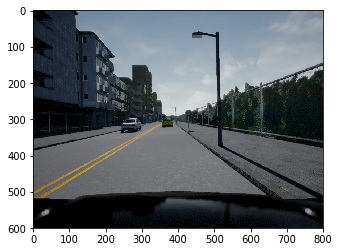

In [8]:
test_image = imageio.imread('datasets/lyft/Train/CameraRGB/130.png')
plt.imshow(test_image)

In [9]:
model = DeeplabModel()
seg_map = model.predict(test_image)

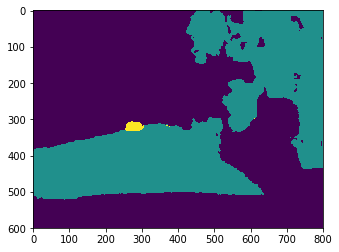

In [10]:
plt.imshow(seg_map)